# My First Hotdog detector

Last time, we managed to get the images we need to build a [sweet sweet hotdog/nohotdog classifier] using [Deep Learning]. This time, we are finally going to play around with Convolutional Neural Networks (CNNs)! But wait, what are those???

[sweet sweet hotdog/nohotdog classifier]: https://www.youtube.com/watch?v=ACmydtFDTGs
[Deep Learning]: https://en.wikipedia.org/wiki/Deep_learning

# Neural Networks

The form our classifier is going to take is the [Convolutional Neural Network (CNN)](). These have revolutionized image classification and a bunch of other tasks (TODO: detail & salesmanship). 

As any other Neural Network, CNNs consist of a series of stacked layers. Each layer consists of a series of neurons. These are simply nodes in a network that hold a floating point value, called their __activation__. Each node in a layer is connected to the layer immediately below, and the connection has a __weight__ associated with it.

The simplest kind of layer that we can think of is one in which each neuron is connected to __all__ the neurons in the preceding layer. This is called a [Dense](https://keras.io/layers/core/#dense) layer. In it, the activation of each neuron will be calculated from the sum of the activations of every single neuron in the previous layer, each multiplied by the corresponding weight. But that sum is not the activation itself; the activation will be calculated from that sum by applying an _activation function_.

![Weights and activations](https://cdn-images-1.medium.com/max/479/1*QVIyc5HnGDWTNX3m-nIm9w.png)

# Activation functions

As we have just seen, the connection between a neuron and the layer below is shaped by an _activation function_. This describes the relationship between the values in the preceding layer, the weights, and the activation value. For each neuron its activation $a_i$ will be determined by the expression:

$$a_i = f(\sum_j^n(a_i w_{ij}))$$ 

That $f$ is the activation function. There are a number of them that can be used without changing terribly how the NN performs. The requisites are basically:

1. The activation function must be nonlinear. If it was, the whole network would be just a chain of matrix multiplications, and the output would be a linear function of the output. We could save all the trouble and just summarize the whole thing with a single multiplication. And, obviously, it wouldn't learn anything useful. The fun in NNs is that they are [Universal Function Approximators](http://neuralnetworksanddeeplearning.com/chap4.html).

1. The activation function must be differentiable. That is crucial for our gradient descent (remember [the last post](TODO: internal link)): we need the derivative, the gradient, to know in what direction we need to push the weights in every step of the optimization.

An early function that was widely used is the logistic function, the same used in logistic regression. If you think about it, then the expression above is exactly logistic regression. Therefore, a neural network can be thought of as a series of logistic regressions stacked one over the other!

In reality, the current most used activation function is the [Rectified Linear Unit](https://www.kaggle.com/dansbecker/rectified-linear-units-relu-in-deep-learning) (ReLu), but at this level the distinction is mostly academic. We don't need to go into the practical or theoretical differences between the ReLu and the logistic to get a general understanding of how NNs work.

# Backpropagation

In logistic regression, we pick the coefficients (corresponding to our _weights_ here) to minimize an error measure given a set of inputs and corresponding outputs. If we had an error measure here, we could adjust the weights so that the error measure for each input is minimized. But we do! it is the difference (measured in any of a number of ways) between the predictions of the network and the true classes. That will work for the last layer. 

What about the bottom layers? Well, if we had a perfect last hidden layer, then the previous one would have to predict its activations for a given input. Then, the error measure is the difference between the output of the previous and the "perfect" hidden layer! We can apply this reasoning to adjust the weights of each layer from the top to the bottom (back), for each layer in turn.

Backpropagation is just that! A fancy way of saying: adjust by one step of gradient descent the last layer, then the second-to-last in view of those last layer weights, and so on until you reach the bottom. Rinse and repeat until you are satisfied with the results. This is the breakthrough that made neural networks trainable.

# Convolutional Neural Networks

We've been talking about neural networks like there was only one kind. However, the recent explosion in Deep Learning performance and width of application is due in no small part to the invention of a variety of network kinds which are especially suited to particular tasks. In our specific application, image classification, and more generally in computer vision the kind that suits us best is the Convolutional Neural Network. This is a network that includes one or more [convolutional layers](https://keras.io/layers/convolutional/#conv2d).

A convolutional layer differs from a dense layer in that each neuron in it doesn't look at the whole layer below it but only to a small region of it, often 3 x 3 or 5 x 5. That means that the first convolutional layer will look at squares of 9 or 25 pixels in much the same way that a neuron in a dense layer looks at its whole input layer. That results first in a huge reduction in number of parameters, which could explode with the kind of input sizes that an image classifier must handle - [TODO: introduce] remember, each pixel in the image will result in three nodes in the input layer! this is a great bonus, but not the main point. The real advantages are:

* Translation invariance: a neuron in a convolutional layer will learn to be activated in response to a particular visual feature. It will not care where that feature is: a neuron that recognizes vertical edges will recognize them anywhere in the image. 

* Hierarchy of features: I've mentioned the _first_ convolutional layer. What about the ones above it? Those will recognize to recognize features based on features: they will combine basic features (vertical or horizontal lines, for example) into more and more general features: grids, parallel arrays, then objects from the real world composed of those features.


![Hierarhcy of features](https://cdn-images-1.medium.com/max/756/1*jl3je_hGCESg-G8dy3Z9Yg.png)





# Environment

Our work will be made sweet and easy by [Keras](https://keras.io/). Keras is just the kind of tool I love: it will let you do the most common operations quickly and easily, but it still gives you the power to go under the hood and have total control if you need it. It is a library built specifically for Deep Learning on Python by François Chollet and others. It runs on top of different backends, like Theano and Tensorflow. These are amazing libraries, but not the kind of thing that you want to deal with if you want to build your first prototype and iterate on it fast. You can think of the relationship between Keras and Tensorflow kind of like that between scikit-learn and numpy.

![Keras](https://s3.amazonaws.com/keras.io/img/keras-logo-2018-large-1200.png)

In order to follow the code below, you'll need to set up a working Keras environment. TODO.

At this point we want to get our first classifier up and running, so let's get on with it!

In [1]:
import keras
from keras import backend as K

Using TensorFlow backend.


We are going to learn some hotdogs! The basic tool we are going to use is a Convolutional Neural Network (CNN). CNNs have revolutionized computer vision in the last few years

In [2]:
from keras.layers import Conv2D, MaxPooling2D, InputLayer, Flatten, Dense

my_first_cnn = keras.Sequential()
my_first_cnn.add(Conv2D(32, (3, 3), activation='relu', input_shape=(120, 120, 3)))
my_first_cnn.add(MaxPooling2D((2,2)))
my_first_cnn.add(Conv2D(32, (3, 3), activation='relu'))
my_first_cnn.add(MaxPooling2D((2,2)))
my_first_cnn.add(Flatten())
my_first_cnn.add(Dense(64, activation='relu'))
my_first_cnn.add(Dense(1, activation='sigmoid'))

my_first_cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 118, 118, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 59, 59, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 57, 57, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                1605696   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total para

In [3]:
%%time
from keras.preprocessing.image import ImageDataGenerator
import os

base_dir = 'data//'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_datagen = ImageDataGenerator(rescale=1 / 255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1 / 255)

train_generator = train_datagen.flow_from_directory(train_dir, 
                                                    target_size=(120,120),
                                                    batch_size=100,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(120,120),
                                                        batch_size=100,
                                                        class_mode='binary')

Found 4765 images belonging to 2 classes.
Found 888 images belonging to 2 classes.
CPU times: user 334 ms, sys: 52.8 ms, total: 387 ms
Wall time: 416 ms


In [4]:
%%time
from keras.optimizers import Adam

my_first_cnn.compile(loss='binary_crossentropy',
                     optimizer=Adam(lr=1e-3),
                     metrics=['acc'])

history = my_first_cnn.fit_generator(train_generator,
                                     steps_per_epoch=30,
                                     epochs=10,
                                     validation_data=validation_generator,
                                     validation_steps=10)

Epoch 1/10
30/30 [==============================] - 66s 2s/step - loss: 0.4430 - acc: 0.8539 - val_loss: 0.3390 - val_acc: 0.8745
Epoch 2/10
30/30 [==============================] - 73s 2s/step - loss: 0.3174 - acc: 0.8760 - val_loss: 0.2843 - val_acc: 0.8715
Epoch 3/10
30/30 [==============================] - 70s 2s/step - loss: 0.2922 - acc: 0.8762 - val_loss: 0.2883 - val_acc: 0.8704
Epoch 4/10
30/30 [==============================] - 76s 3s/step - loss: 0.2936 - acc: 0.8695 - val_loss: 0.2473 - val_acc: 0.8735
Epoch 5/10
30/30 [==============================] - 66s 2s/step - loss: 0.2674 - acc: 0.8787 - val_loss: 0.2504 - val_acc: 0.8674
Epoch 6/10
30/30 [==============================] - 63s 2s/step - loss: 0.2726 - acc: 0.8727 - val_loss: 0.2298 - val_acc: 0.8735
Epoch 7/10
30/30 [==============================] - 66s 2s/step - loss: 0.2594 - acc: 0.8793 - val_loss: 0.2288 - val_acc: 0.8694
Epoch 8/10
30/30 [==============================] - 67s 2s/step - loss: 0.2773 - acc: 0.87

Magic! In only a few minutes, we are getting a classifier with close to 90% accuracy! Time to celebrate!


![Party!](https://thumbs.gfycat.com/AdvancedPleasedIlsamochadegu-size_restricted.gif)

Let's go to bed with that sweet sweet feeling. Future Dani will take care of the cleanup.

# Evaluating the classifier

Now that I come to think of it, we have XXXX hotdog images and XXXX nohotdog images, so a lazy classifier that assigns everything a 'nothotdog' label would get around 87% accuracy. Let's check if that's the case.

### Confusion matrix, precision and recall

The confusion matrix is a basic conceptual tool in binary classification. It's just a matrix such that rows represent true classes and columns represent predicted classes. 

Keras has assigned the label 0 to our hotdog class, which we consider positive, and 1 to our nothotdog class, which we consider negative. Therefore, in our binary classification setting we will have true positives top left, true negatives bottom right, false positives bottom left, and false negatives top right.

Therefore, precision will be

$$ precision = \frac{true\ positives}{predicted\ positives} = \frac{C_{0,0}}{C_{0,0} + C_{1,0}} $$

and recall will be:

$$ recall = \frac{true\ positives}{total\ positives} = \frac{C_{0,0}}{C_{0,0} + C_{0,1}}$$


In [5]:
%%time
validation_generator_noshuffle = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(120,120),
                                                        batch_size=100,
                                                        shuffle=False,                                                            
                                                        class_mode='binary')

predictions = my_first_cnn.predict_generator(validation_generator_noshuffle)

predictions.shape

Found 888 images belonging to 2 classes.
CPU times: user 30.2 s, sys: 3.99 s, total: 34.2 s
Wall time: 8.24 s


0.8 0.21052631578947367


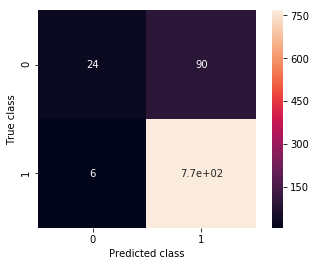

In [6]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
%matplotlib inline

C = confusion_matrix(validation_generator_noshuffle.classes, predictions > .5)
ax = sns.heatmap(C, annot=True, square=True)
ax.set_ylabel('True class')
ax.set_xlabel('Predicted class')

precision = C[0,0] / (C[0,0] + C[1,0])
recall = C[0][0] / (C[0,0] + C[0,1])

print(precision, recall)

Oh. Right. That means that only XXX% of our predicted hotdogs are such, and that we only detect around XXX% of all the hotdogs in the dataset. That is, when our users get a "hotdog" prediction, the probability that they are pointing at a hotdog will be around 80%. Not awful, but nothing to write home about either. However, the real problem is in the other metric, recall. That value means that when they point at a hotdog, the probability that the app recognizes it is only 20%! Not a great user experience. In short, our classifier is being way too cautious. It doesn't risk a "hotdog" prediction very often, and therefore it is not wrong very often. 

That illustrates a very important idea to keep in mind: choose the right metrics! Specially in unbalanced datasets, accuracy can be pretty misleading. We are fitting on binary cross entropy, which will naturally focus on getting right the most common class. In order to compensate for the fact that we have many more nothotdogs than hotdogs, `fit_generator` provides a `class_weight` parameter that allows us to artificially give more importance to underrepresented or specially important classes. Let's try it:

In [7]:
%%time
from keras.optimizers import Adam

my_first_cnn.compile(loss='binary_crossentropy',
                     optimizer=Adam(lr=1e-3),
                     metrics=['acc'])

history = my_first_cnn.fit_generator(train_generator,
                                     class_weight = {0: 7, 1: 1},
                                     steps_per_epoch=30,
                                     epochs=10,
                                     validation_data=validation_generator,
                                     validation_steps=10)

Epoch 1/10
30/30 [==============================] - 71s 2s/step - loss: 1.1038 - acc: 0.8043 - val_loss: 0.3255 - val_acc: 0.8563
Epoch 2/10
30/30 [==============================] - 66s 2s/step - loss: 1.0393 - acc: 0.8046 - val_loss: 0.5262 - val_acc: 0.6791
Epoch 3/10
30/30 [==============================] - 60s 2s/step - loss: 0.9617 - acc: 0.8033 - val_loss: 0.3430 - val_acc: 0.8168
Epoch 4/10
30/30 [==============================] - 69s 2s/step - loss: 0.9440 - acc: 0.7817 - val_loss: 0.3060 - val_acc: 0.8259
Epoch 5/10
30/30 [==============================] - 65s 2s/step - loss: 0.8727 - acc: 0.7967 - val_loss: 0.3235 - val_acc: 0.8047
Epoch 6/10
30/30 [==============================] - 62s 2s/step - loss: 0.9171 - acc: 0.7903 - val_loss: 0.3559 - val_acc: 0.7804
Epoch 7/10
30/30 [==============================] - 66s 2s/step - loss: 0.9391 - acc: 0.7936 - val_loss: 0.3903 - val_acc: 0.7318
Epoch 8/10
30/30 [==============================] - 64s 2s/step - loss: 0.8851 - acc: 0.77

This time the confusion matrix is this one:

0.3434343434343434 0.8947368421052632


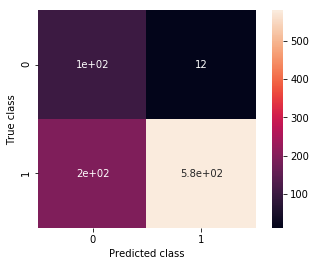

In [8]:
predictions = my_first_cnn.predict_generator(validation_generator_noshuffle)

C = confusion_matrix(validation_generator_noshuffle.classes, predictions > .5)
ax = sns.heatmap(C, annot=True, square=True)
ax.set_ylabel('True class')
ax.set_xlabel('Predicted class')

precision = C[0,0] / (C[0,0] + C[1,0])
recall = C[0][0] / (C[0,0] + C[0,1])

print(precision, recall)

Much better! This won't blow Jian-Yang away, but it's a a lot better, despite having worse accuracy. Consider that before this morning, you had no idea how to code a program to have some perception of the real world. Now you can!

Anyway, we have a classifier. It's not great, but I'm sure it can get better. Let's train it a bit more, shall we?

In [9]:
%%time
from keras.optimizers import Adam

my_first_cnn.compile(loss='binary_crossentropy',
                     optimizer=Adam(lr=1e-3),
                     metrics=['acc'])

history_pt2 = my_first_cnn.fit_generator(train_generator,
                                         steps_per_epoch=30,
                                         epochs=20,
                                         validation_data=validation_generator,
                                         validation_steps=10,
                                         verbose=1)

Epoch 1/20
30/30 [==============================] - 66s 2s/step - loss: 0.2494 - acc: 0.8901 - val_loss: 0.2224 - val_acc: 0.9079
Epoch 2/20
30/30 [==============================] - 65s 2s/step - loss: 0.2274 - acc: 0.8923 - val_loss: 0.2471 - val_acc: 0.8856
Epoch 3/20
30/30 [==============================] - 60s 2s/step - loss: 0.2344 - acc: 0.8986 - val_loss: 0.2337 - val_acc: 0.9069
Epoch 4/20
30/30 [==============================] - 66s 2s/step - loss: 0.2343 - acc: 0.8973 - val_loss: 0.2077 - val_acc: 0.9150
Epoch 5/20
30/30 [==============================] - 68s 2s/step - loss: 0.2360 - acc: 0.8951 - val_loss: 0.2075 - val_acc: 0.9099
Epoch 6/20
30/30 [==============================] - 72s 2s/step - loss: 0.2308 - acc: 0.8957 - val_loss: 0.2174 - val_acc: 0.9180
Epoch 7/20
30/30 [==============================] - 65s 2s/step - loss: 0.2112 - acc: 0.9046 - val_loss: 0.2023 - val_acc: 0.9150
Epoch 8/20
30/30 [==============================] - 61s 2s/step - loss: 0.2225 - acc: 0.90

What's happening here? We are seeing a typical case of overfitting. Our training loss is improving really fast, but at the same time the validation loss increases in each epoc. The network is learning the specific details of the training set, which don't generalize all that well to the samples in the validation set. 

CPU times: user 93.6 ms, sys: 843 µs, total: 94.4 ms
Wall time: 51.2 ms


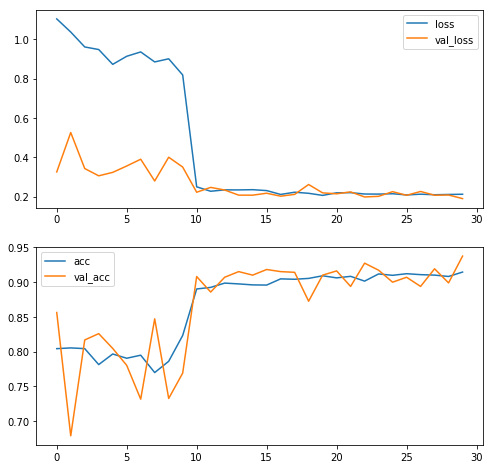

In [10]:
%%time
import matplotlib.pyplot as plt

f, axes = plt.subplots(2,1)

f.set_size_inches(8,8)

nb_epochs = len(history.epoch)
concatenated = history.epoch + [nb_epochs + epoch_number for epoch_number in history_pt2.epoch]

axes[0].plot(concatenated, history.history['loss'] + history_pt2.history['loss'], label='loss')
axes[0].plot(concatenated, history.history['val_loss'] + history_pt2.history['val_loss'], label='val_loss')
axes[0].legend()

axes[1].plot(concatenated, history.history['acc'] + history_pt2.history['acc'], label='acc')
axes[1].plot(concatenated, history.history['val_acc'] + history_pt2.history['val_acc'], label='val_acc')
axes[1].legend()

0.7456140350877193 0.7456140350877193
CPU times: user 29.7 s, sys: 4.22 s, total: 33.9 s
Wall time: 8.15 s


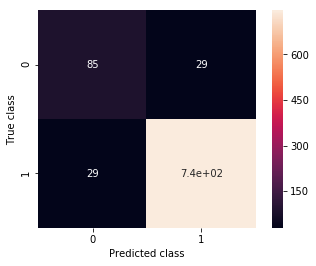

In [11]:
%%time
predictions = my_first_cnn.predict_generator(validation_generator_noshuffle)

C = confusion_matrix(validation_generator_noshuffle.classes, predictions > .5)
ax = sns.heatmap(C, annot=True, square=True)
ax.set_ylabel('True class')
ax.set_xlabel('Predicted class')

precision = C[0,0] / (C[0,0] + C[1,0])
recall = C[0][0] / (C[0,0] + C[0,1])

print(precision, recall)

This is the tightrope act that we must make all the time when practising Machine Learning: the [bias-variance tradeoff]. In short, that refers to the trade-off between flexibility and generality of the models. A sufficiently flexible (read: complicated) model will always be able to learn non-relevant details of the input dataset (to overfit), and Neural Networks are nothing if not complicated: notice above where we built our simple CNN: it has over $10^6$ parameters! That's over a million knobs to tweak.

Overfitting means we have high variance: different samples will lead to very different estimations of the parameters. That will manifest as higher validation loss than training loss, as we see here from about epoch 8.

The solutions are simple but varied, and we need to keep many of them in our bag of tools for different occasions. Some are very general and some are pretty specific, but all of them fall under the heading of [regularization]. [This] is probably the best explanation of that that I've heard. In short, we want to penalize somehow the complexity of our models. That will in turn result in better generality.

In our specific example, image recognition, there's one very intuitive way to make our model recognize more varied images of hotdogs: to feed it more varied images of hotdogs. Since we already collected as many as we could, what we can do is to _generate_ more varied images of hotdogs. And that is exactly what we'll do in the next installment of this series.

[bias-variance tradeoff]: https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff
[regularization]: https://en.wikipedia.org/wiki/Regularization_(mathematics)#Generalization
[This]: https://www.coursera.org/lecture/machine-learning/regularization-and-bias-variance-4VDlf

### Further Reading

[Deep Learning with Python](https://www.manning.com/books/deep-learning-with-python): A great introductory book by  François Chollet, author of Keras. Explains the practice first, then goes down to theory.

[Interview with François Chollet](https://www.pyimagesearch.com/2018/07/02/an-interview-with-francois-chollet/), author of DL with Python.

[Implementing a Neural Network from scratch with Python](https://medium.com/@curiousily/tensorflow-for-hackers-part-iv-neural-network-from-scratch-1a4f504dfa8): An in depth view of the internal architecture of a NN, with a tutorial to implement backpropagation.

[Activation functions and their types](https://towardsdatascience.com/activation-functions-and-its-types-which-is-better-a9a5310cc8f): A nice discussion of activation functions.